# IMPORTAR LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

#
___

# DATA SETS - LECTURA

In [2]:
df_academico = pd.read_csv("../01_data/02_processed/ds_academico.csv", sep=",") 
df_academico.head() 

,Daytime/evening attendance,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,1,2.909,2,2,3.391,0,0,1,1,0,...,0,0,0,0.000,0,0,0,0,0.000,0
1,1,6.364,1,1,4.773,0,0,0,1,0,...,6,6,6,7.000,0,6,6,6,6.833,1
2,1,2.909,3,3,3.164,0,0,0,1,0,...,6,0,0,0.000,0,6,0,0,0.000,0
3,1,2.909,3,3,2.691,0,0,1,0,0,...,6,8,6,6.714,0,6,10,5,6.200,1
4,0,0.909,3,3,4.682,0,0,1,0,0,...,6,9,5,6.167,0,6,6,6,6.500,1


In [21]:
df_academico_train = pd.read_csv("../01_data/03_train/ds_academico_train.csv", sep=",") 
df_academico_train 

,Daytime/evening attendance,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,0,3.918,3,3,3.300,0,0,1,0,1,...,5,7,0,0.000,0,5,8,0,0.000,0
1,1,2.818,1,1,2.264,0,0,1,1,1,...,7,9,6,6.671,0,8,10,7,5.825,1
2,1,3.091,1,1,2.618,0,1,0,0,0,...,10,16,6,5.917,2,7,8,2,6.500,0
3,0,3.636,2,1,5.636,0,0,1,0,0,...,5,0,0,0.000,0,5,0,0,0.000,0
4,1,3.182,3,3,3.945,0,0,1,1,1,...,6,8,6,6.000,0,6,8,6,5.750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,1,2.727,2,3,2.164,0,0,0,1,0,...,5,0,0,0.000,0,5,0,0,0.000,0
3263,1,4.636,1,2,3.345,0,0,1,1,0,...,8,8,8,6.624,0,8,8,8,6.624,1
3264,1,5.818,1,1,6.809,0,0,1,0,0,...,6,6,6,7.000,0,6,6,6,6.583,1
3265,1,3.000,1,1,3.191,0,1,1,1,1,...,6,6,6,7.167,0,6,6,6,7.667,1


In [4]:
df_academico_test = pd.read_csv("../01_data/04_test/ds_academico_test.csv", sep=",") 
df_academico_test.head(1)

,Daytime/evening attendance,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,1,2.545,2,2,2.927,0,0,1,0,0,...,5,11,3,5.333,0,5,9,4,5.125,1


#
___

# ENTRENAMIENTO

## TRAIN - TEST SPLIT

In [36]:
X = df_academico_train[["Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (approved)" ]]  
y = df_academico_train['Target']                 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## MODELOS SUPERVISADOS

# IMPORTANTE!!!!!

### Logistic Regression

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pickle

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(random_state=42, max_iter=1000)) 
])


param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],           
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'logreg__solver': ['saga', 'liblinear'] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)


accuracy_lr = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred))


with open('../04_models/final_model_basico.pkl', 'wb') as f:
    print("Creado")
    pickle.dump(grid_search, f)

Mejores hiperparámetros: {'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       402
           1       0.86      0.97      0.91       579

    accuracy                           0.89       981
   macro avg       0.90      0.87      0.88       981
weighted avg       0.90      0.89      0.89       981

Creado


In [25]:
pre = grid_search.predict([[1,8.0,3,3,8.0,0,0,1,1,1,18,0,5,5,5,5,8.0,5,5,5,5,8.0]])
print(pre)

[0]


In [29]:
df_test = pd.read_csv("../01_data/04_test/ds_academico_test.csv")
df_target_test = df_test["Target"]
df_test = df_test.drop(columns=['Target']) 



In [30]:
df_test

,Daytime/evening attendance,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,1,2.545,2,2,2.927,0,0,1,0,0,...,0,5,11,3,5.333,0,5,9,4,5.125
1,1,3.636,3,3,2.936,0,1,0,0,0,...,0,6,8,6,7.071,0,6,6,5,6.000
2,1,8.182,1,1,8.500,0,0,1,0,0,...,0,7,8,4,6.000,0,8,8,0,0.000
3,1,3.364,2,1,5.455,0,0,1,0,1,...,0,7,9,5,6.925,0,8,9,7,6.096
4,1,1.818,2,2,1.818,0,0,1,1,0,...,0,6,7,0,0.000,0,6,6,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,1,2.727,2,2,2.727,0,0,1,0,0,...,0,6,6,6,6.500,0,6,6,6,6.833
359,0,5.455,1,3,4.536,0,0,1,0,0,...,0,6,9,5,6.500,0,6,6,6,7.083
360,0,5.064,3,3,5.064,0,0,1,0,0,...,8,16,16,15,6.667,11,13,13,11,6.136
361,0,2.727,2,3,5.673,0,0,1,1,0,...,0,5,5,5,7.600,0,5,6,5,7.083


In [31]:
df_target_test

0      1
1      0
2      0
3      1
4      0
      ..
358    1
359    1
360    1
361    1
362    1
Name: Target, Length: 363, dtype: int64

In [33]:
pre_test = grid_search.predict(df_test)
print(pre_test)

[1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1]


In [34]:
accuracy = accuracy_score(df_target_test, pre_test)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(df_target_test, pre_test))

Accuracy: 0.8953168044077136
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       147
           1       0.89      0.94      0.91       216

    accuracy                           0.90       363
   macro avg       0.90      0.88      0.89       363
weighted avg       0.90      0.90      0.89       363



### K-Nearest Neighbors Classifier (KNN)

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier()) 
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11], 
    'knn__weights': ['uniform', 'distance'],  
    'knn__metric': ['euclidean', 'manhattan'] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Accuracy: 0.8766564729867482
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       402
           1       0.84      0.98      0.90       579

    accuracy                           0.88       981
   macro avg       0.90      0.85      0.87       981
weighted avg       0.89      0.88      0.87       981



### Decision Tree Classifier

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('clf', DecisionTreeClassifier(random_state=42)) 
])

param_grid = {
    'clf__max_depth': [None, 10, 20, 30],       
    'clf__min_samples_split': [2, 5, 10],           
    'clf__min_samples_leaf': [1, 2, 4],             
    'clf__criterion': ['gini', 'entropy']           
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_dtc)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}
Accuracy: 0.8715596330275229
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       402
           1       0.88      0.90      0.89       579

    accuracy                           0.87       981
   macro avg       0.87      0.87      0.87       981
weighted avg       0.87      0.87      0.87       981



### Random Forest Classifier

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestClassifier(random_state=42))
])


param_grid = {
    'rf__n_estimators': [50, 100, 200],      
    'rf__max_depth': [None, 10, 20, 30],      
    'rf__min_samples_split': [2, 5, 10],      
    'rf__min_samples_leaf': [1, 2, 4],       
    'rf__criterion': ['gini', 'entropy']       
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_rfc)
print("Classification Report:")
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

### Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42)) 
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],               
    'svm__kernel': ['linear', 'rbf', 'poly'], 
    'svm__gamma': ['scale', 'auto']           
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("Classification:")
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Accuracy: 0.9153924566768603
Classification:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       402
           1       0.89      0.98      0.93       579

    accuracy                           0.92       981
   macro avg       0.93      0.90      0.91       981
weighted avg       0.92      0.92      0.91       981



### Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42)) 
])


param_grid = {
    'gb__n_estimators': [50, 100, 200],          
    'gb__learning_rate': [0.01, 0.1, 0.2],       
    'gb__max_depth': [3, 5, 7],                
    'gb__min_samples_split': [2, 5, 10],         
    'gb__min_samples_leaf': [1, 2, 4]             
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)


accuracy_gbc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_gbc)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__min_samples_leaf': 4, 'gb__min_samples_split': 2, 'gb__n_estimators': 100}
Accuracy: 0.9072375127420998
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       402
           1       0.89      0.96      0.92       579

    accuracy                           0.91       981
   macro avg       0.91      0.90      0.90       981
weighted avg       0.91      0.91      0.91       981



## MODELOS NO SUPERVISADOS

### CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),          
    ('kmeans', KMeans(random_state=42))    
])


param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],  
    'kmeans__init': ['k-means++', 'random'],             
    'kmeans__n_init': [10, 20, 30]                     
}


silhouette_scorer = make_scorer(silhouette_score)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X)


print("Mejores hiperparámetros:", grid_search.best_params_)


best_model_cluster = grid_search.best_estimator_
labels = best_model_cluster.predict(X)


final_silhouette_score = silhouette_score(X, labels)
print("Silhouette Score del modelo final:", final_silhouette_score)

Mejores hiperparámetros: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 2, 'kmeans__n_init': 10}
Silhouette Score del modelo final: 0.4370778653997049


### PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=10))
pca_pipe.fit(df_academico_train)

modelo_pca = pca_pipe['pca']

pca_pipe['pca']

PCA(n_components=10)

In [13]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data = modelo_pca.components_,
    columns = df_academico_train.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10']
)

,Daytime/evening attendance,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
PC1,0.004785,0.015508,0.003267,0.010208,0.026836,-0.010244,-0.056785,0.111723,-0.081104,0.052309,...,0.336991,0.279310,0.368876,0.274048,0.268109,0.329641,0.280389,0.353136,0.278560,0.193022
PC2,-0.209202,-0.158016,0.151018,0.106222,-0.130050,-0.029806,0.180382,-0.269250,0.171499,-0.238499,...,0.197646,0.200946,-0.068316,-0.236331,0.282001,0.147190,0.122094,-0.144868,-0.261875,-0.352191
PC3,-0.271429,-0.186321,0.561523,0.556784,-0.191590,-0.015106,-0.130559,0.134066,-0.162882,0.191781,...,-0.062496,-0.039574,-0.003393,0.077429,-0.128947,-0.052425,-0.027615,0.028780,0.098415,0.132956
PC4,-0.208767,0.596902,0.138439,0.141465,0.630115,-0.014598,-0.121782,0.088231,0.039946,-0.024580,...,0.002654,-0.118246,0.021761,-0.093047,0.146930,-0.041198,-0.161045,0.005561,-0.074836,0.044942
PC5,0.109621,0.203775,0.158116,0.145467,0.176811,-0.006470,0.599433,-0.458730,-0.157648,0.134381,...,-0.048832,0.124473,0.004357,0.213445,-0.165417,-0.035379,0.177128,-0.008214,0.156485,-0.076540
PC6,0.417871,0.015009,0.119958,0.215964,-0.069588,0.262597,0.031898,-0.037175,-0.313581,0.344986,...,0.135168,-0.145285,0.015224,-0.304419,0.245514,0.124997,-0.193137,0.004652,-0.278141,-0.028975
PC7,-0.294250,-0.126937,-0.063066,-0.163869,-0.118572,-0.200300,-0.009848,0.036422,-0.287760,-0.035583,...,0.001186,-0.160377,0.058459,-0.071519,0.076220,-0.028372,-0.218582,0.069907,-0.010543,0.170591
PC8,-0.215167,-0.024048,-0.051930,-0.076143,-0.013996,0.939330,0.015576,0.025957,0.066004,-0.044561,...,-0.039877,0.005414,0.010220,0.067525,-0.026762,-0.043907,0.020247,0.017257,0.071229,0.030840
PC9,0.409492,0.063597,0.239098,0.219674,0.001558,0.014546,-0.301848,0.197937,0.406889,-0.222648,...,-0.011934,0.170944,-0.059362,0.041220,-0.058858,-0.011051,0.178631,-0.079488,-0.001844,-0.100739
PC10,-0.025844,-0.156567,-0.038083,0.021044,0.002915,-0.064145,0.227275,-0.040637,0.707709,0.512237,...,-0.047421,-0.142006,0.088069,-0.019819,0.123161,-0.077715,-0.161831,0.107153,0.041155,0.202496


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.28440435 0.42046589 0.49745771 0.56516596 0.62046025 0.66931559
 0.71302682 0.75603607 0.79572577 0.83101846]


Text(0, 0.5, 'Por. varianza acumulada')

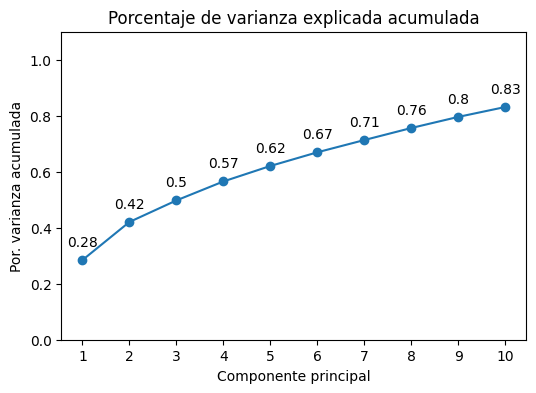

In [14]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))


ax.plot(
    np.arange(modelo_pca.n_components_) + 1,
    prop_varianza_acum,
    marker='o'
)


for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

In [15]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=7))
pca_pipe.fit(df_academico_train)


X_train_pca = pca_pipe.transform(df_academico_train)
X_test_pca = pca_pipe.transform(df_academico_test)


pca_train_df = pd.DataFrame(X_train_pca, columns=[f'PCA{i+1}' for i in range(7)])
pca_test_df = pd.DataFrame(X_test_pca, columns=[f'PCA{i+1}' for i in range(7)])


print("Datos de entrenamiento después de PCA (primeros 5 registros):")
print(pca_train_df.head())
print("\nDatos de prueba después de PCA (primeros 5 registros):")
print(pca_test_df.head())

Datos de entrenamiento después de PCA (primeros 5 registros):
       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7
0 -2.744250  1.847926  2.263046  1.209081 -0.643976  0.498155  0.558518
1  1.220951 -1.206534 -0.933138 -1.795604 -0.818824 -0.410143 -0.263175
2  1.317610  2.656308 -2.779175 -1.813269  2.217389  0.508605 -0.065586
3 -3.881452  1.185844 -0.283756  2.277641 -1.768377 -0.409911  1.625378
4  0.462517 -1.031351  1.410428  0.007016  0.042180  0.339019 -0.808919

Datos de prueba después de PCA (primeros 5 registros):
       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7
0 -0.243321 -0.660677  0.234288 -1.239882 -0.443958 -0.253315  0.064480
1 -0.516077  1.126598  0.366356 -0.981739  3.434471  0.497278 -0.509625
2 -0.845947 -0.755307 -4.045508  4.037779  2.455942  0.514149  3.965043
3  1.336295 -1.842498 -0.473529  0.093876  0.205326  0.212361 -0.044169
4 -2.953083  2.286757 -0.158735 -1.329699 -1.960175  0.263967 -0.187435


Accuracy del modelo con mejores hiperparámetros: 0.9393939393939394

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       147
           1       0.94      0.96      0.95       216

    accuracy                           0.94       363
   macro avg       0.94      0.93      0.94       363
weighted avg       0.94      0.94      0.94       363



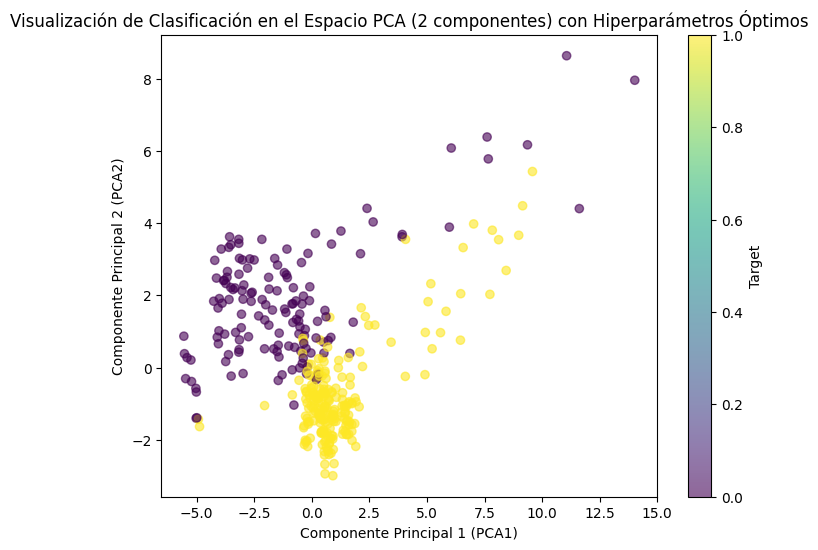

In [16]:
# voy a hacer una prueba con los mejores parametros de mi modelo de Logistic Regression que he realizado previamente

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


model_lr_bueno = LogisticRegression(C=1, penalty='l1', solver='liblinear')
model_lr_bueno.fit(pca_train_df, df_academico_train['Target']) 

y_pred = model_lr_bueno.predict(pca_test_df)
accuracy = accuracy_score(df_academico_test['Target'], y_pred)
print("Accuracy del modelo con mejores hiperparámetros:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(df_academico_test['Target'], y_pred))

# Visualización de los resultados en los dos primeros componentes principales
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_test_df['PCA1'], pca_test_df['PCA2'], c=y_pred, cmap='viridis', alpha=0.6)
plt.xlabel("Componente Principal 1 (PCA1)")
plt.ylabel("Componente Principal 2 (PCA2)")
plt.title("Visualización de Clasificación en el Espacio PCA (2 componentes) con Hiperparámetros Óptimos")
plt.colorbar(scatter, label="Target");

In [19]:
valores = model_lr_bueno.predict([[0,8.0,3,3,8.5,1,0,0,0,18,1,5,5,5,5,8.5,5,5,5,5,8.5]])
print(valores)

ValueError: X has 21 features, but LogisticRegression is expecting 7 features as input.

# RESULTADOS

In [ ]:
print("Precisión de los Modelos Supervisados:")
print("")
print("- Logistic Regression Accuracy:", round(accuracy_lr, 4))
print("- Support Vector Machine Accuracy:", round(accuracy_svm, 4))
print("- Gradient Boosting Classifier Accuracy:", round(accuracy_gbc, 4))
print("- Random Forest Accuracy:", round(accuracy_rfc, 4))
print("- K-Nearest Neighbors Accuracy:", round(accuracy_knn, 4))
print("- Decision Tree Accuracy:", round(accuracy_dtc, 4))

Precisión de los Modelos Supervisados:

- Logistic Regression Accuracy: 0.9174
- Support Vector Machine Accuracy: 0.9154
- Gradient Boosting Classifier Accuracy: 0.9072
- Random Forest Accuracy: 0.9042
- K-Nearest Neighbors Accuracy: 0.8767
- Decision Tree Accuracy: 0.8716




In [20]:
print("Precisión de los Modelos NO Supervisados:")
print("")
print("- Clustering final silhouette score:", final_silhouette_score)
print("- aplicada regla de 3, SCORE: 0.72")
print("")
print("- PCA con Logistic Regression(mejores parametros): 0.94")

Precisión de los Modelos NO Supervisados:

- Clustering final silhouette score: 0.4370778653997049
- aplicada regla de 3, SCORE: 0.72

- PCA con Logistic Regression(mejores parametros): 0.94


In [19]:
# tenemos claro ganador :)

#
___

# PRUEBA CON TEST

In [ ]:
# predicciones_submit = best_model.predict(df_academico_test)

# df_academico_test['SeriousDlqin2yrs'] = predicciones_submit

# # df_resultados = df_academico_test[['SeriousDlqin2yrs']].reset_index()